# <span style='font-family:Inter'> Fat Tails Notes

In [2]:
import scipy.stats as stat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

sys.path.insert(0, r'C:\Users\lucab\PycharmProjects\Warehouse')

from Viz.charting import generate_ax
from Viz.aestethics import base

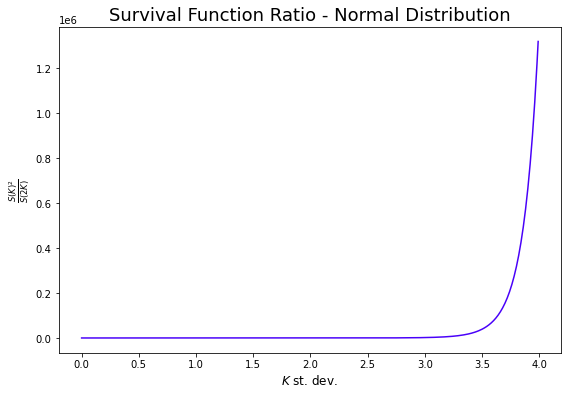

In [5]:
survival_ratio = {i: stat.norm.sf(i, 1)**2 / stat.norm.sf(2 * i, 1) for i in np.arange(0, 4, 0.01)}
ax = generate_ax('Survival Function Ratio - Normal Distribution', '$K$ st. dev.', r'$\frac{S(K)^2}{S(2K)}$')
pd.Series(survival_ratio).plot(ax=ax, color=base)
plt.show()

In [6]:
def sum_probability(sum_target=4, dist=stat.norm, **kwds):
    
    sum_1 = np.arange(0, sum_target, 0.01)
    sum_2 = sum_target - sum_1

    sum_l = []
    for i, j in zip(sum_1, sum_2):
        sum_l.append([i, j, dist.pdf(i, **kwds) * dist.pdf(j, **kwds)])
    
    sum_df = pd.DataFrame(sum_l, columns=['x1', 'x2', 'pdf'])
    return sum_df

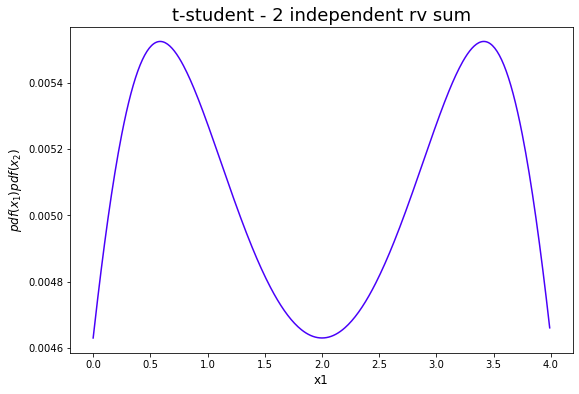

In [7]:
ax = generate_ax('t-student - 2 independent rv sum', '$x_1$', '$pdf(x_1) pdf(x_2)$')
sum_probability(dist=stat.t, **{'df': 2}).set_index('x1').loc[:, 'pdf'].plot(ax=ax, color=base)
plt.show()

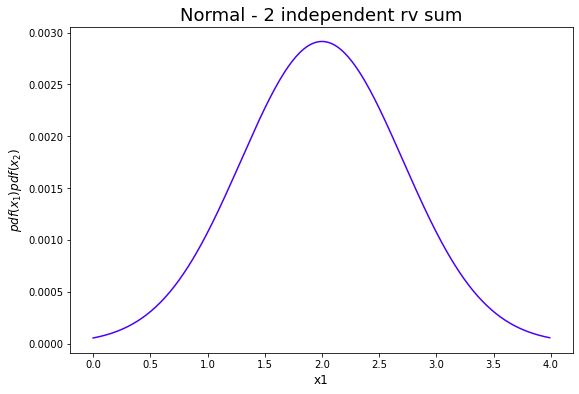

In [8]:
ax = generate_ax('Normal - 2 independent rv sum', '$x_1$', '$pdf(x_1) pdf(x_2)$')
sum_probability(dist=stat.norm).set_index('x1').loc[:, 'pdf'].plot(ax=ax, color=base)
plt.show()

<AxesSubplot:title={'center':'Cauchy - 2 independent rv sum'}, xlabel='x1', ylabel='$pdf(x_1) pdf(x_2)$'>

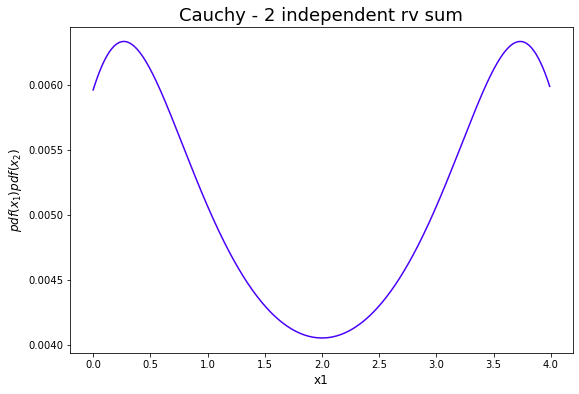

In [9]:
ax = generate_ax('Cauchy - 2 independent rv sum', '$x_1$', '$pdf(x_1) pdf(x_2)$')
sum_probability(dist=stat.cauchy).set_index('x1').loc[:, 'pdf'].plot(ax=ax, color=base)

___
## <span style='font-family:Inter'> Second Moment vs First Moment Distribution

> The second moment of a random variable is necessarily more thick-tailed than the variable itself

By the **delta method**?

In [19]:
samples = 100000
n = 1000
mu = 1
df = pd.DataFrame(np.random.normal(mu, 1, [samples, n])).T

In [20]:
((df.mean() - mu)* np.sqrt(n)).var()

0.9960794387823092

In [21]:
((df.mean() ** 2 - mu ** 2)* np.sqrt(n)).var()

3.9851023356685116

In [22]:
ax = generate_ax('Survival Function Ratio - Normal Distribution', '$K$ st. dev.', r'$\frac{S(K)^2}{S(2K)}$')
sns.kdeplot(df.mean() ** 2, alpha=0.5)
sns.kdeplot(df.mean(), alpha=0.5, color=base)

NameError: name 'generate_ax' is not defined

ax = generate_ax('Survival Function Ratio - Normal Distribution', '$K$ st. dev.', r'$\frac{S(K)^2}{S(2K)}$')
import seaborn as sns
sns.kdeplot(df.mean() ** 2, ax=ax)

___

## <span style='font-family:Inter'> Law of Large Numbers Convergence 

How long does it take for a random variable to converge to its mean? The answer depends on the distribution.

For a **normal distribution**:

In [18]:
std = 1
size= 30
normal_mean_std_theoretical = std / np.sqrt(size)
normal_mean_std = pd.DataFrame(np.random.normal(0, std, [30, 10000])).mean().std()
print('realized value: ', normal_mean_std, '\ntheoretical value: ', normal_mean_std_theoretical)

realized value:  0.18071183589310916 
theoretical value:  0.18257418583505536


For a **t-student with 3 degrees of freedom**:

In [16]:
dof = 3
size = 75
std = np.sqrt(dof /(dof - 2))
normal_mean_std_theoretical = std / np.sqrt(size)
stf_t_mean_std = pd.DataFrame(np.random.standard_t(dof, [75, 10000])).mean().std()
print('relized value: ', stf_t_mean_std, '\ntheoretical value: ', normal_mean_std_theoretical)

relized value:  0.20481146066192418 
theoretical value:  0.19999999999999996


___

## <span style='font-family:Inter'> Power Law
    
One attribute of power laws is their scale invariance. Given a relation ${\displaystyle f(x)=ax^{-k}}$, scaling the argument ${\displaystyle x}$ by a constant factor ${\displaystyle}c$ causes only a proportionate scaling of the function itself. That is,

$${\displaystyle f(cx)=a(cx)^{-k}=c^{-k}f(x)\propto f(x),\!}$$

where ${\displaystyle \propto }$  denotes direct proportionality.



___

## <span style='font-family:Inter'> Chapter 4 - Univariate Fat Tails

Jensen's inequality recall (convex definition): 

$${\displaystyle f\left(tx_{1}+(1-t)x_{2}\right)\leq tf(x_{1})+(1-t)f(x_{2}).}$$

For a Gaussian, tail probabilities are convex to the scale of the distribution ($\sigma$). This allows to fatten the tails byu making the standard deviation stochastic


- Fat tails manifest themselves with higer peaks
- Fatten tails with skewed variance


### <span style='font-family:Inter'> MAD vs STD

In [2]:
import numpy as np
import pandas as pd

In [30]:
s = np.random.normal(0, 1, 10000)
STD = s.std()
MAD = np.mean(abs(s))

print('Mean Absolute Deviation (MAD): ', MAD)
print('Standard Deviation (STD): ', STD)
print('MAD/STD', MAD/STD)

Mean Absolute Deviation (MAD):  0.8049127656840604
Standard Deviation (STD):  1.0094912072514475
MAD/STD 0.7973449990471984


By Jensen's inequality, MAD cannot be higher than STD. The standard deviation is at least as large as the mean absolute deviation: **The function $φ(z)=z^2$ is strictly convex** over non-negative argument values; from Jensen's inequality it follows that:

$$\mathbb{V}(X)=\mathbb{E}\Big((X-\mu)^2\Big) = \mathbb{E}\Big(\varphi(|X-\mu|)\Big) \geqslant \varphi\Big(\mathbb{E}(|X-\mu|)\Big) = \mathbb{E}(|X-\mu|)^2,$$

or, setting $\mu = 0$:

$$\mathbb{V}(X)=\mathbb{E}\Big(X^2\Big) = \mathbb{E}\Big(\varphi(|X|)\Big) \geqslant \varphi\Big(\mathbb{E}(|X|)\Big) = \mathbb{E}(|X|)^2,$$

In [22]:
s = pd.Series([-1] * (1000000 -1) + [1000000])

In [26]:
s.std(), abs(s).mean()

(1000.001, 1.999999)

STD historically overcame MAD because of its higher efficiency for nomally distributed RVs. Namely, the asymptotic relative efficency of $n$ rvs is  defined as:

$$\lim_{n \to \infty} \bigg(\frac{V(std)}{E(std)^2} \bigg/ \frac{V(mad)}{E(mad)^2} \bigg)$$

- The numerator, this is the ratio between variance and mean squared of a [Chi distribution](https://en.wikipedia.org/wiki/Chi_distribution)
- The denominatior, check *folded normal*

We switch between:
- Gaussian with variance $\sigma^2 (1+a)$ with probability $p$
- Gaussian with variance $\sigma^2$ with probability $1-p$
and compute relative efficency. In this case, $p=.01$ and $n=1000$

SD is only optimal in Mediocristan. When we start moving toward Extremistan, SD blows up due to being a sum of squares. Even relatively small deviations wash away the efficiency of SD over MAD. Thus, when dealing with fat-tails, SD should not be used as it can lead to very imprecise estimates of the probability at the tails. Thus, SD is not an appropriate measure of the scale of the distribution for fat tails. It is much better to use the MAD. That is, MAD is a better estimator of 
$E(|X−\mu|)$ than SD as an estimator of $\sigma$


In [11]:
import pandas as pd
import numpy as np
p = 0.01
ratio_dict = {}
base_variance = 1
for a in range(10):
    print(a)
    n_simul_list = []
    n_simul = 40
    for i in np.arange(n_simul):
        variance = base_variance * (1 + a * np.random.choice([0, 1], 1000, p=[1-p, p]))
        one_simul_list = []
        for i in variance:
            one_simul_list.append(np.random.normal(0, np.sqrt(i)))

        n_simul_list.append(one_simul_list)
        
    df = pd.DataFrame(n_simul_list)
    STD_dist = df.std(axis=1)
    MAD_dist = abs(df - df.mean()).mean(axis=1)
    ratio = (STD_dist.var() / STD_dist.mean()**2)/(MAD_dist.var() / MAD_dist.mean()**2)
    ratio_dict[a] = ratio

0
1
2
3
4
5
6
7
8
9


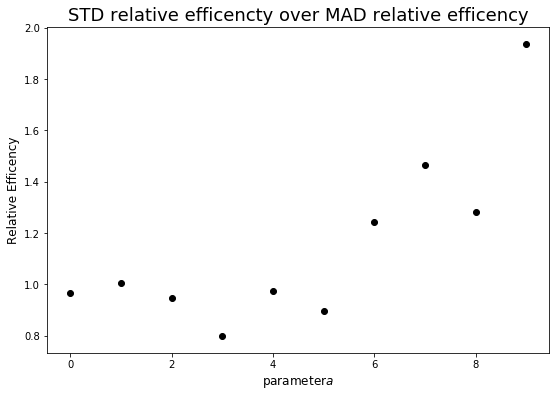

In [25]:
import matplotlib.pyplot as plt
ax = generate_ax('STD relative efficencty over MAD relative efficency', 'parameter$a$', 'Relative Efficency')
s = pd.Series(ratio_dict)
plt.scatter(s.index, s.values, c='black')

### <span style='font-family:Inter'> Curse of Dimensionality
    
Link to <span style='font-family:Inter'> [**Machine Learning (Practice) Notebook**](/notebooks/PycharmProjects/Warehouse/MachineLearning/Machine%20Learning%20Notes%20-%20Practice.ipynb)

___

## <span style='font-family:Inter'> Chapter 5 - Some Poperties of Power Laws
   
Different levels of distribution:

- *Degenerate*
- *Binomial*
- *Normal*
- *Subexponential*: **all the moments are defined** but they do not satisfy Cramer condition (non insurability, technically the exp value of the exponential of the rv does not exist)
- *Power Law with exponent $2\leq \alpha \leq 3$ (supercubic)*; first and second moment are defined, so CLT and LLN should apply
- *Power Law with exponent $1\leq \alpha \leq 2$ (Levy Stable)*: variance does not exist but mean absolute deviation does
- *Power Law with exponent: $\alpha \leq 1$*

<div class="alert alert-info">
    
$$\lim _{K \rightarrow \infty} \frac{1}{K} \mathbb{E}(X \mid X>K)=\lambda$$

- If $\lambda = 1$, $X$ is said to be in the thin tailed class and has a characteristic scale
- If $\lambda \geq 1$, $X$ is said to be in the fat tailed regular variation class and has no characteristic
- If $$\lim _{K \rightarrow \infty} \mathbb{E}(X \mid X>K) - K=\mu$$ where $\mu > 0$, then X is in the borderline exponential class
</div>

<AxesSubplot:>

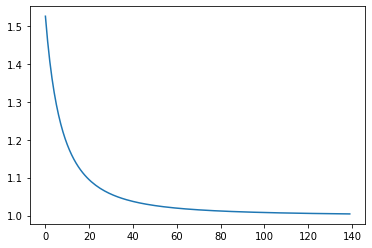

In [17]:
l = []
for i in np.arange(1, 15, 0.1):
    D = stat.norm()
    cond_expect = D.dist.expect(lambda x: x, D.args, lb=i, conditional=True)
    l.append(cond_expect / i)
    
pd.Series(l).plot()

<AxesSubplot:>

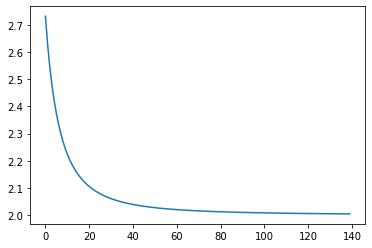

In [19]:
l = []
for i in np.arange(1, 15, 0.1):
    D = stat.t(2)
    cond_expect = D.dist.expect(lambda x: x, D.args, lb=i, conditional=True)
    l.append(cond_expect / i)
    
pd.Series(l).plot()

In [44]:
D = stat.beta(0.5, 0.1)
print(D.cdf(0.01))
cond_expect = D.dist.expect(lambda x: x, D.args, lb=0.6, conditional=True)
print(cond_expect)

0.017716321020397913
0.9596627965110088


{0.0: 0.0, 0.01: 1.0000000000000002e-20, 0.02: 1.0240000000000003e-17, 0.03: 5.904899999999998e-16, 0.04: 1.0485760000000003e-14, 0.05: 9.765625000000005e-14, 0.06: 6.046617599999998e-13, 0.07: 2.8247524900000026e-12, 0.08: 1.0737418240000003e-11, 0.09: 3.486784400999999e-11, 0.1: 1.0000000000000006e-10, 0.11: 2.5937424601000003e-10, 0.12: 6.191736422399997e-10, 0.13: 1.3785849184900004e-09, 0.14: 2.8925465497600027e-09, 0.15: 5.7665039062499975e-09, 0.16: 1.0995116277760003e-08, 0.17: 2.0159939004490016e-08, 0.18: 3.570467226623999e-08, 0.19: 6.131066257801e-08, 0.2: 1.0240000000000006e-07, 0.21: 1.6679880978200994e-07, 0.22: 2.6559922791424003e-07, 0.23: 4.1426511213649017e-07, 0.24: 6.340338096537597e-07, 0.25: 9.5367431640625e-07, 0.26: 1.4116709565337604e-06, 0.27: 2.0589113209464914e-06, 0.28: 2.9619676669542428e-06, 0.29: 4.207072333002007e-06, 0.3: 5.9048999999999975e-06, 0.31: 8.196282869808009e-06, 0.32: 1.1258999068426243e-05, 0.33: 1.5315789852644496e-05, 0.34: 2.0643777540

<AxesSubplot:>

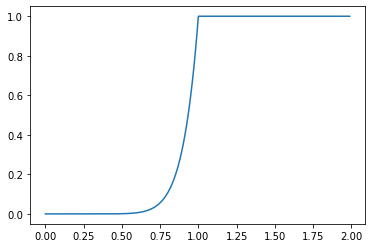

In [56]:
alpha = 10
d = {}
for i in np.arange(0, 2, 0.01):
    D = stat.powerlaw(alpha)
    d[i] = D.cdf(i)
print(d)
pd.Series(d).plot()

### <span style='font-family:Inter'> Subexponential Distribution
$$
\overline{F^{*2}}(x) \sim 2\overline{F}(x) \quad \mbox{as } x \to \infty. 
$$
    
where $\overline{F}(x) = 1-F(x)$. So, the probability of the **sum** of two iid copies of the rv exceeding $x$ is exactly twice the probability of one exceeding $x$, i.e. each copy has a probability of exceeding $x$ **alone** which is not disproportionately lower of the sum exceeding $x$, as it happens in the Gaussian case.
    
- first: $$\lim_{x \to + \infty} \frac{\Pr(S_n > x)}{\Pr (X > x)} = n$$

- second: $$\lim_{x \to + \infty} \frac{\Pr(S_n > x)}{\Pr (M_n > x)} = 1$$
    where $M_n$ is the expanding maximum 
    
- The probabilistic interpretation of this is that, for a sum of ${\displaystyle n}$ independent random variables ${\displaystyle X_{1},\ldots ,X_{n}}$ with common distribution ${\displaystyle F}$,

- absence of exponential moments
    
    
$$
\Pr[X_1+ \cdots +X_n>x] \sim \Pr[\max(X_1, \ldots,X_n)>x] \quad \text{as } x \to \infty. 
$$
    

In [10]:
from primitive import log_log_plot_with_threshold

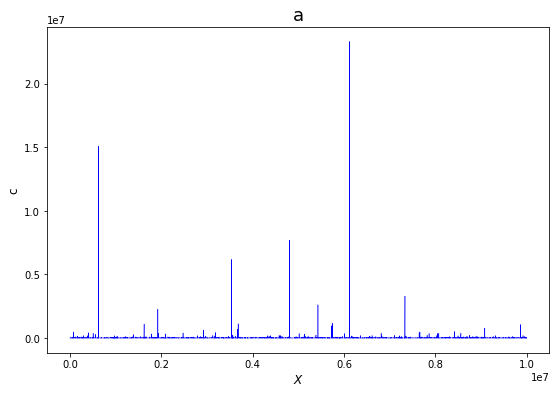

In [59]:
ax = generate_ax('a', '$X$', 'c')
s = pd.Series(np.random.pareto(1, 10000000))
s.plot(ax=ax, linewidth=0.5, color='blue')
plt.show()

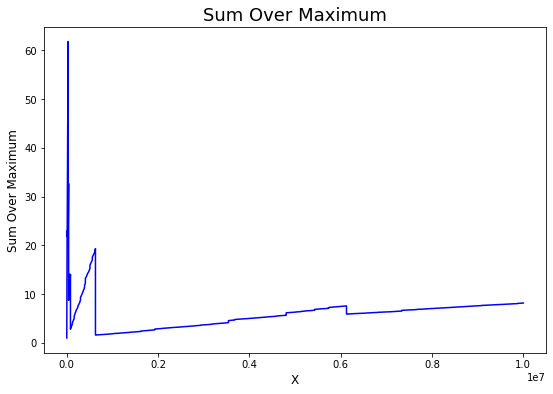

In [61]:
ax = generate_ax('Sum Over Maximum', 'X', 'Sum Over Maximum')
(s.expanding().sum() / s.expanding().max()).plot(ax=ax, color='blue')
plt.show()

### <span style='font-family:Inter'> Power Laws </span>

In power laws,

$$ \frac{\Pr(X > nK)}{\Pr (X > k)} = n$$

depends on $n$ and not on $K$ ($K$ is in the tails).

In [69]:
n = 2
b = 3
ratio_dict = {}
for K in np.arange(2, 21):
    survival_K = (1-stat.pareto.cdf(K, b=b))
    survival_nK = (1-stat.pareto.cdf(K*n, b=b))
    
    print('k=%s' %K, '-',
          '1/survival_K:', round(1/survival_K, 2), 
          '1/survival_nK:', round(1/survival_nK, 2))
    
    ratio = (1-stat.pareto.cdf(K, b=b)) / (1-stat.pareto.cdf(K*n, b=b))
    ratio_dict[K] = ratio

k=2 - 1/survival_K: 8.0 1/survival_nK: 64.0
k=3 - 1/survival_K: 27.0 1/survival_nK: 216.0
k=4 - 1/survival_K: 64.0 1/survival_nK: 512.0
k=5 - 1/survival_K: 125.0 1/survival_nK: 1000.0
k=6 - 1/survival_K: 216.0 1/survival_nK: 1728.0
k=7 - 1/survival_K: 343.0 1/survival_nK: 2744.0
k=8 - 1/survival_K: 512.0 1/survival_nK: 4096.0
k=9 - 1/survival_K: 729.0 1/survival_nK: 5832.0
k=10 - 1/survival_K: 1000.0 1/survival_nK: 8000.0
k=11 - 1/survival_K: 1331.0 1/survival_nK: 10648.0
k=12 - 1/survival_K: 1728.0 1/survival_nK: 13824.0
k=13 - 1/survival_K: 2197.0 1/survival_nK: 17576.0
k=14 - 1/survival_K: 2744.0 1/survival_nK: 21952.0
k=15 - 1/survival_K: 3375.0 1/survival_nK: 27000.0
k=16 - 1/survival_K: 4096.0 1/survival_nK: 32768.0
k=17 - 1/survival_K: 4913.0 1/survival_nK: 39304.0
k=18 - 1/survival_K: 5832.0 1/survival_nK: 46656.0
k=19 - 1/survival_K: 6859.0 1/survival_nK: 54872.0
k=20 - 1/survival_K: 8000.0 1/survival_nK: 64000.0


In [59]:
pd.Series(ratio_dict, name='k')

2     8.0
3     8.0
4     8.0
5     8.0
6     8.0
7     8.0
8     8.0
9     8.0
10    8.0
11    8.0
12    8.0
13    8.0
14    8.0
15    8.0
16    8.0
17    8.0
18    8.0
19    8.0
20    8.0
Name: k, dtype: float64

As we can see, the ratio is stable for $k$ varying.

More on Power laws:

$$ \Pr_{X>x} = Cx^{-\alpha}$$
    
For $x$ large enough, 

$$ \frac{\log{P_{X>x}}}{\log x}$$
    
converges to a constant, mainly the tail exponent $-\alpha$

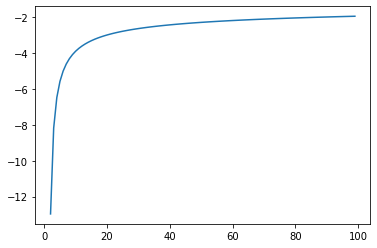

In [75]:
n = 2
b = 3
ratio_dict = {}
for x in np.arange(2, 100):
    log_greater_x = np.log((1-stat.pareto.cdf(K, b=b)))
    log_x = np.log(x)
    ratio_dict[x] = log_greater_x / log_x
    
pd.Series(ratio_dict).plot()
plt.show()

#### Some Properties
1. **Tail exponent of a sum**: Let $X_1, X_2, . . . X_n$ be random variables neither independent nor identically distributed,
each $X_i$ following a distribution with a different asymptotic tail exponent ai (we assume that random variables outside the power law class will have an asymptotic $\alpha = \pm \infty$). Assume further we are concerned with the right tail of the distribution. Consider the weighted sum $S_n = \sum_{i=1}^{n} w_i X_i$, with all weights wi strictly positive.
Consider as the tail exponent for the sum. For all $w_i > 0$: $$\alpha_S = \min(\alpha_i)$$i.e. **Power Laws + Thin Tails = Power Laws**

    <div class="alert alert-info">
    if $\alpha_2 \leq \alpha_2$ and $w_2 > 0$,
    $$
    \lim_{x \to \infty} \frac{\log (w_1 x^{-\alpha_1} + w_2 x^{-\alpha_2})}{\log(x)} = \alpha_2
    $$
    </div>
    

2. **Transformations**: Let $X$ be a random variable with tail exponent $\alpha$. The tail exponent of $X^p$ is $\frac{a}{p}$. This means, e.g. that the variance of a finite variance random variable with tail exponent < 4 will be infinite

### <span style='font-family:Inter'> Notes </span>

- A robust statistics is usually addressed as a statistic that doesn't change for large tail events. It could do so simply because "it is **uninformative**", and not because it is robust.
